In [1]:
import librosa
import librosa.display
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
X_test = np.load('/Users/deepak/Desktop/Data_Science/Springboard/SB_Capstone2/X_test.dat', allow_pickle=True)
df_y_test_pred = pd.read_csv('/Users/deepak/Desktop/Data_Science/Springboard/SB_Capstone2/y_test_&_predictions.csv')

In [3]:
confusion_matrix(df_y_test_pred['y_test'], df_y_test_pred['predictions'])

array([[414,   5,   1,   2,   3,   0,   0,   0,   0,   0,   5,  10,   0,
          4,   0,   4,   4,   0,   0,   2,   0,   1,   0,   0,   0,   1,
          0,   1,   4,   1,   1],
       [  5, 443,   0,   2,   0,   1,   0,   0,   0,   0,   1,   2,   0,
         10,   0,   1,   2,   1,   0,   1,   0,   0,   3,   0,   0,   4,
          1,   1,   0,   0,   1],
       [  1,   0, 317,   0,   5,   3,   3,   1,   0,   0,   1,   4,   1,
          1,   0,   0,   1,   1,   0,   8,   0,   0,   1,   0,   1,   0,
          0,   0,   1,   2,   1],
       [  3,   3,   0, 299,   0,   2,   1,   0,   0,   0,   0,   0,   0,
         35,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   1,   1],
       [  0,   9,   2,   0, 350,   0,   0,   0,   0,   0,   2,   3,   0,
          0,   0,   0,   9,   0,   2,   1,   1,   0,   0,   0,   1,   1,
          0,   1,   2,   0,   0],
       [  0,   0,   1,   0,   0, 337,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,

In [4]:
SAVED_MODEL_PATH = "/Users/deepak/Desktop/Data_Science/Springboard/SB_Capstone2/model.h5"

#Load Model
model = tf.keras.models.load_model(SAVED_MODEL_PATH)

In [5]:
predictProbabilities = (model.predict(X_test))
top5Predictions = [(-i).argsort()[:5] for i in predictProbabilities]
df_y_test_pred['top5'] = top5Predictions

In [6]:
df_y_test_pred.head()

,Unnamed: 0,y_test,predictions,top5
0,0,2,24,"[24, 2, 7, 12, 21]"
1,1,1,1,"[1, 4, 0, 25, 5]"
2,2,11,11,"[11, 0, 15, 26, 21]"
3,3,13,3,"[3, 13, 5, 1, 16]"
4,4,18,30,"[30, 22, 15, 19, 6]"


In [7]:
df_y_test_pred.to_csv("/Users/deepak/Desktop/Data_Science/Springboard/SB_Capstone2/predictionsDF.csv")

<br>

<br>

#### Predicting s test audio file

In [8]:
mapping = ['right', 'eight', 'cat', 'tree', 'bed', 'happy', 'go', 'dog', 'no', 'wow', 'nine', 'left', 'stop', 'three', 'sheila', 'one', 'bird', 'zero', 'seven', 'up', 'noise', 'marvin', 'two', 'house', 'down', 'six', 'yes', 'on', 'five', 'off', 'four']

In [9]:
#file_path = "/Users/deepak/Desktop/Data_Science/Springboard/SB_Capstone2/test/bed.wav"
#file_path = "/Users/deepak/Desktop/Data_Science/Springboard/SB_Capstone2/test/down.wav"
file_path = "/Users/deepak/Desktop/Data_Science/Springboard/SB_Capstone2/test/up.wav"

SAMPLES_TO_CONSIDER = 22050
num_mfcc=13
n_fft=2048
hop_length=512

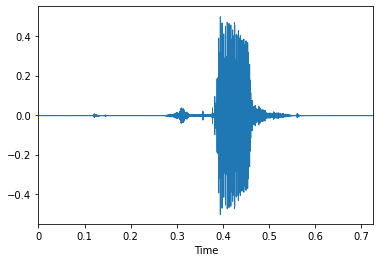

In [10]:
#Preprocess the test file
signal, sample_rate = librosa.load(file_path, sr=None)

#Plot
librosa.display.waveplot(signal)

In [11]:
#Preprocessing the input

zero_padding = 22050 - len(signal)
signal = np.pad(signal,(0,zero_padding), 'constant')
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=13, n_fft=2048,hop_length=512)
MFCCs = MFCCs.T
MFCCs.shape
MFCCs = MFCCs[np.newaxis, ..., np.newaxis]
MFCCs.shape

(1, 44, 13, 1)

In [12]:
#Predictions

predictions = model.predict(MFCCs)
predicted_index = np.argmax(predictions)
predicted_keyword = mapping[predicted_index]
print(predicted_keyword)

up
